# Neshan Bootcamp

Mehrdad Mohammadian

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# First, you must import the cartwheel data from the path given above
df = pd.read_csv("/content/drive/MyDrive/Data Scientist/Statistics/Visualization/Multivariate Data/Cartwheeldata.csv")

In [24]:
# Next, look at the 'head' of our DataFrame 'df'.
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


If you can't remember a function, open a previous notebook or video as a reference, or use your favorite search engine to look for a solution.

## Scatter plots

First, let's looks at two variables that we expect to have a strong relationship, 'Height' and 'Wingspan'.

<Axes: xlabel='Height', ylabel='Wingspan'>

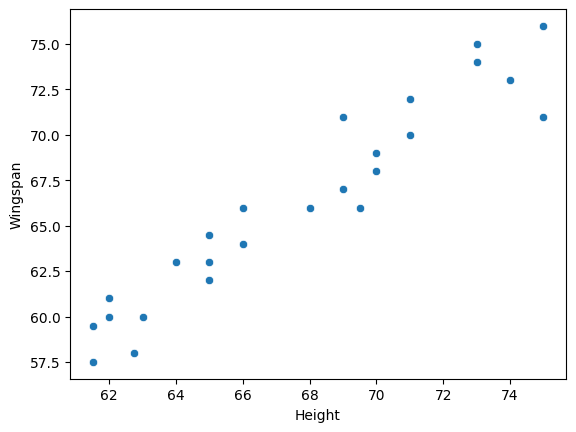

In [25]:
# Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)
sns.scatterplot(x=df['Height'], y=df['Wingspan'])

# How would you describe the relationship between 'Height' and 'Wingspan'?   
**ans: they have a strong positive relationship.**


---


#  Is it linear?
**ans: yes, it is!**


---


#  Are there outliers?
**ans: no, ther is not any.**

**Some points are a bit far from the line, but we cannot say that they are really outliers!**


---


#  Are their ranges similar or different?  

Height range --> 74 - 62 =  12

Wingspan range --> 75 - 57.5 = 17.5

so, they are somwhow close, but they are not similar!




---


# How else could you describe the relationship?
**ans: because they have a positive relationship, by increase of one, the other aslo will increase.**

Now let's look at two variables that we don't yet assume have a strong relationship, 'Wingspan' and 'CWDistance'

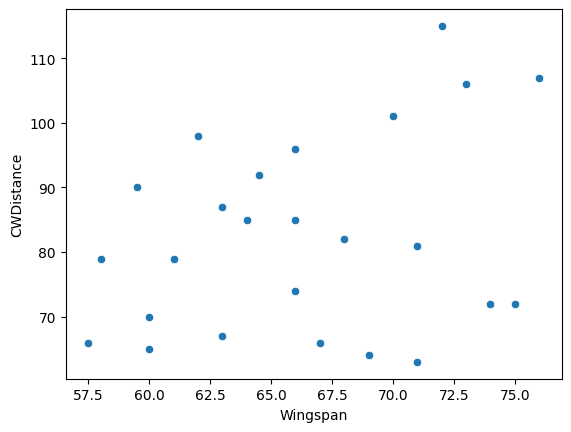

In [33]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
sns.scatterplot(x=df['Wingspan'], y=df['CWDistance']);

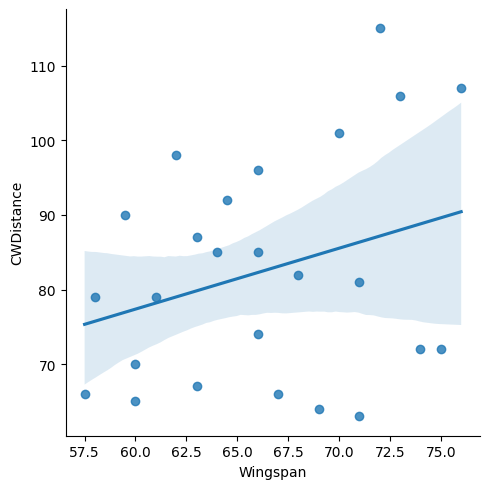

In [27]:
sns.lmplot(x='Wingspan', y='CWDistance', data=df)

# How would you describe the relationship between 'Wingspan' and 'CWDistance'?   

**ans: there is a weak positive relationship between these two!**

---


#  Is it linear?

**ans: based on the above line, yes there is linear relationship between them.**

---


#  Are there outliers?

**ans: yes, some of them are outliers. Based on the caculated correlation which is positive , by increasing one variable the other should also increase. But in some data points this rule is not followed.**


---


#  Are their ranges similar or different?  

**ans: vary different!**

Wingspan range --> 75 - 57.5 = 17.5

CWDistance range --> 110 - 70 = 40


---


# How else could you describe the relationship?

**ans: For a better explnation we can use peason correlation. Their correlation is about 0.29. So, they have a weeak positive correlation with eachother. Code is below.**

In [28]:
# pearson correlation

np.corrcoef(df['Wingspan'], df['CWDistance'])

array([[1.        , 0.29766184],
       [0.29766184, 1.        ]])

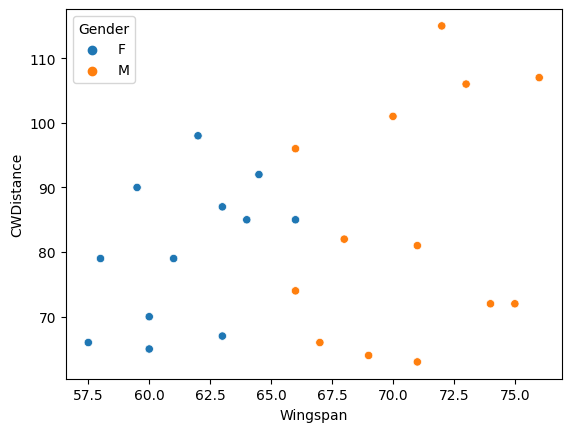

In [32]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
sns.scatterplot(x=df['Wingspan'], y=df['CWDistance'], hue=df['Gender']);

Gender
F    0.458121
M    0.274762
dtype: float64


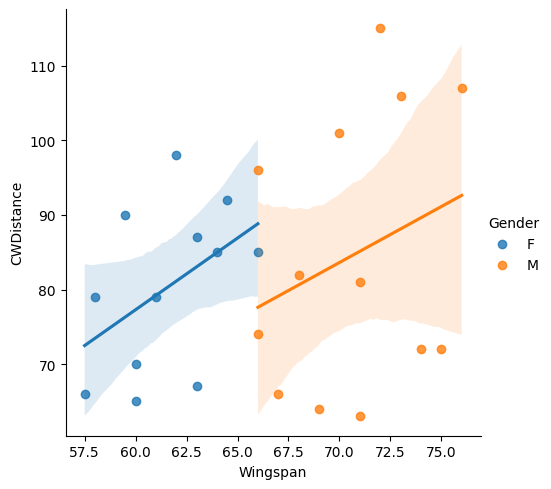

In [36]:
sns.lmplot(x='Wingspan', y='CWDistance', hue='Gender', data=df);
correlations = df.groupby('Gender').apply(lambda group: group['Wingspan'].corr(group['CWDistance']))
print(correlations)

# Does does this new information on the plot change your interpretation of the relationship between 'Wingspan' and 'CWDistance'?


**ans: Well, now it is more interesting! Because we can see an imaginary line between men and female, around 65.0**

**Apart from that, I can see a positive linear relationship in the female proportion, which is more stronger than the men section.It is also can be ssen in results of the group-wise correlation.**

## Barcharts
Now lets plot barplots of 'Glasses'

<Axes: xlabel='Glasses', ylabel='CWDistance'>

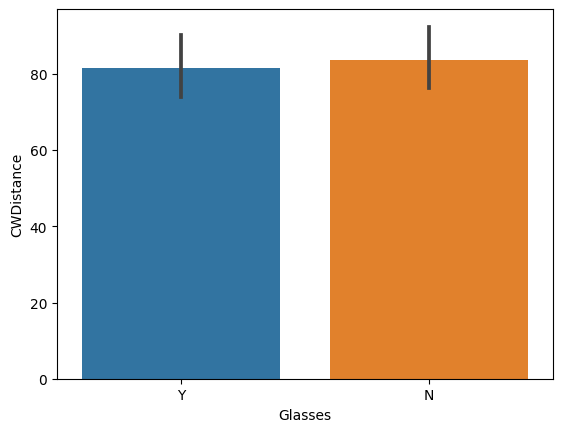

In [30]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance
sns.barplot(x=df['Glasses'], y=df['CWDistance'])

# What can you say about the relationship of 'Glasses' and 'CWDistance'?

**ans: Both groups of people (who wear glasses or not) are so similar to each other. N category ranked first, followed by Y by a narrow margin.**

<Axes: xlabel='Glasses', ylabel='CWDistance'>

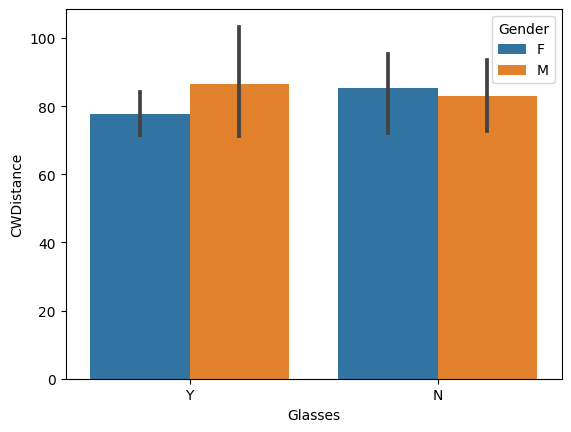

In [31]:
# Make the same Seaborn boxplot as above, but include gender for the hue argument
sns.barplot(x=df['Glasses'], y=df['CWDistance'], hue=df['Gender'])

# How does this new plot change your interpretation about the relationship of 'Glasses' and 'CWDistance'?


**ans: Here, the interesting thing is that in Y category, men have a much more CWDistance, while in N ones women are a bit more than men. May men have a better performance when they wear glasses**